In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
im = cv2.imread('/content/drive/MyDrive/Eafit - Semestre 10/Visión por computador/Talleres/Taller 4/cat.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Aplicar el operador Sobel para la detección de bordes
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)

# Normalizar el resultado de Sobel para que los valores estén en el rango de 0 a 255
sobel = np.uint8(255 * sobel / np.max(sobel))

# Aplicar un umbral para crear una máscara binaria
_, binary_mask = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)

# Encontrar los contornos de la máscara binaria
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara vacía para el objeto principal
mascara_objeto = np.zeros_like(gray)

# Dibujar el contorno más grande (el gato) en la máscara
contorno_principal = max(contours, key=cv2.contourArea)
cv2.drawContours(mascara_objeto, [contorno_principal], -1, 255, thickness=cv2.FILLED)

# Invertir la máscara para obtener el fondo
mascara_fondo = cv2.bitwise_not(mascara_objeto)

# Definir los colores de fondo deseados
fondo_blanco = (255, 255, 255)  # Blanco
fondo_verde_claro = (144, 238, 144)  # Verde claro
fondo_cafe_claro = (210, 180, 140)  # Café claro

# Función para cambiar el fondo de la imagen
def cambiar_fondo(imagen, mascara_objeto, color_fondo):
    nuevo_fondo = np.full_like(imagen, color_fondo, dtype=np.uint8)
    imagen_resultante = cv2.bitwise_and(imagen, imagen, mask=mascara_objeto)
    imagen_resultante += cv2.bitwise_and(nuevo_fondo, nuevo_fondo, mask=mascara_fondo)
    return imagen_resultante

# Cambiar el fondo a blanco
imagen_fondo_blanco = cambiar_fondo(im, mascara_objeto, fondo_blanco)
# Cambiar el fondo a verde claro
imagen_fondo_verde_claro = cambiar_fondo(im, mascara_objeto, fondo_verde_claro)
# Cambiar el fondo a café claro
imagen_fondo_cafe_claro = cambiar_fondo(im, mascara_objeto, fondo_cafe_claro)



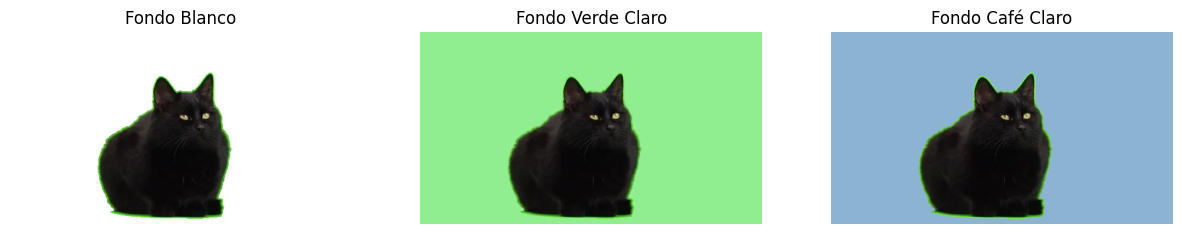

In [ ]:
# Mostrar las imágenes resultantes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen_fondo_blanco, cv2.COLOR_BGR2RGB))
plt.title('Fondo Blanco')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imagen_fondo_verde_claro, cv2.COLOR_BGR2RGB))
plt.title('Fondo Verde Claro')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imagen_fondo_cafe_claro, cv2.COLOR_BGR2RGB))
plt.title('Fondo Café Claro')
plt.axis('off')

plt.show()


Ejercicio 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


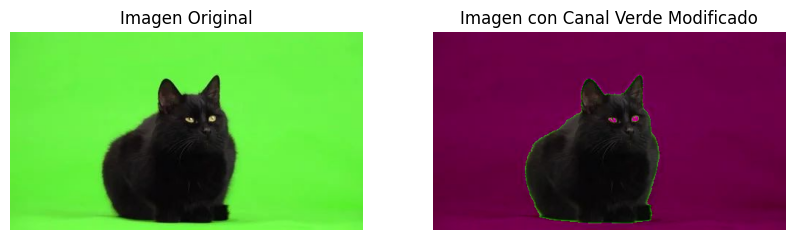

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Montar Google Drive para acceder a la imagen
from google.colab import drive
drive.mount('/content/drive')

# Cargar la imagen
im = cv2.imread('/content/drive/MyDrive/Eafit - Semestre 10/Visión por computador/Talleres/Taller 4/cat.jpg')

# Seleccionar el canal verde
green = im[:, :, 1].copy()

# Definir un umbral para el canal verde
umbral = 150

# Aplicar el indexado booleano para modificar el canal verde
green[green > umbral] = 0

# Reemplazar el canal verde en la imagen original
im_modificada = im.copy()
im_modificada[:, :, 1] = green

# Mostrar la imagen original y la imagen modificada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(im_modificada, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Canal Verde Modificado')
plt.axis('off')

plt.show()

